In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

In [2]:
student_data=pd.read_csv('/users/veronicaventure/Desktop/student-por.csv')

In [3]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Text(0, 0.5, 'Number of Students')

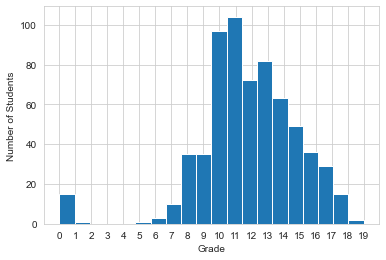

In [4]:
sns.set_style('whitegrid')
plt.hist(student_data.G3,bins=20)
plt.xticks(np.arange(0, 20, step=1))
#label
plt.xlabel('Grade')
plt.ylabel('Number of Students')

This chart shows the distribution of grades.

In [5]:
max(student_data.G3)

19

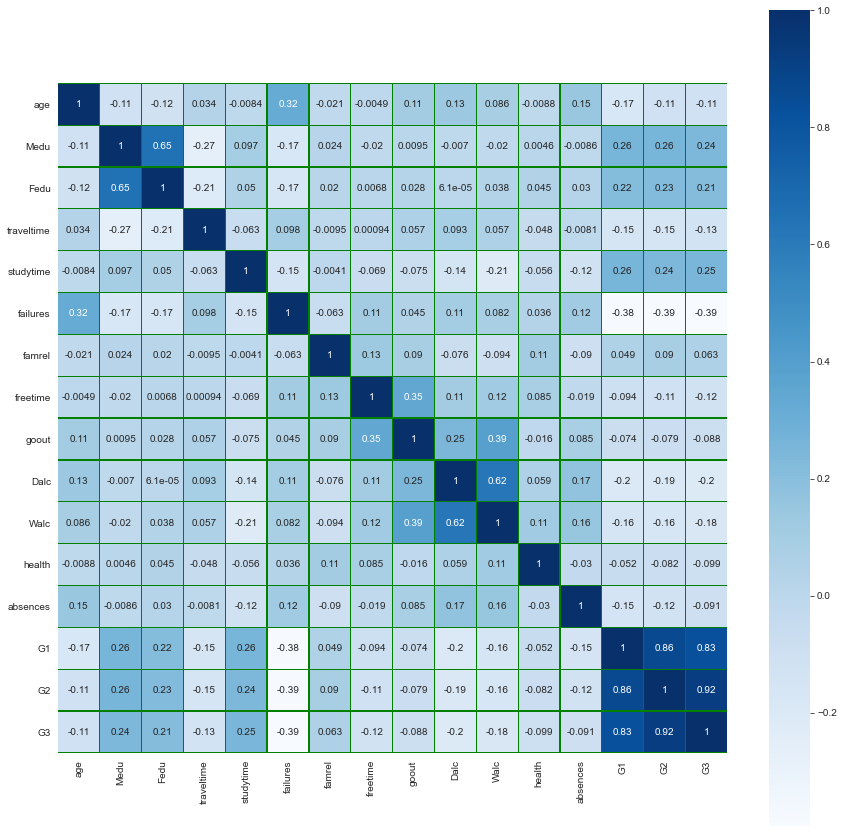

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(student_data.corr(),
            linewidths = 0.25,
            square = True,
            cmap = 'Blues',
            linecolor = 'green',
            annot= True);

We can see that G1, G2 and G3 are highly correlated with each other. We can see that studytime has a significant correlation to G1, G2 and G3. Medu and Fedu which refer to mother's education and father's education respectively are also correlated with G1, G2, and G3. Failures are negatively correlated with G1, G2, and G3.

## Linear Regression

In [7]:
import sklearn
from sklearn.linear_model import LinearRegression

In [8]:
#create new data set with only numerical data
cols=[0,1,3,4,5,8,9,10,11]
student_data_num=student_data.drop(student_data.columns[cols], 1)
student_data_num.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,yes,no,no,no,...,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,no,yes,no,no,...,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,yes,no,no,no,...,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,no,yes,no,yes,...,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,no,yes,no,no,...,4,3,2,1,2,5,0,11,13,13


In [9]:
student_data_num=student_data_num.replace(to_replace=['no','yes'], value=[0,1])

In [10]:
# Create a LinearRegression Object
lreg = LinearRegression()

In [11]:
#all columns except target. 
# these variables represent the features
X_multi = student_data_num.drop('G3',1)

# Targets
Y_target = student_data_num.G3

In [12]:
lreg.fit(X_multi,Y_target)

LinearRegression()

In [13]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is -0.30 


In [14]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 23 


In [15]:
#create a df to show the coefficients of the model
# Set a DataFrame from the Features
coeff_df = DataFrame(student_data_num.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,age,0.040409
1,Medu,-0.044338
2,Fedu,0.030950
3,traveltime,0.094266
4,studytime,0.063850
5,failures,-0.219890
6,schoolsup,-0.154093
7,famsup,0.152646
8,paid,-0.206363
9,activities,0.019762


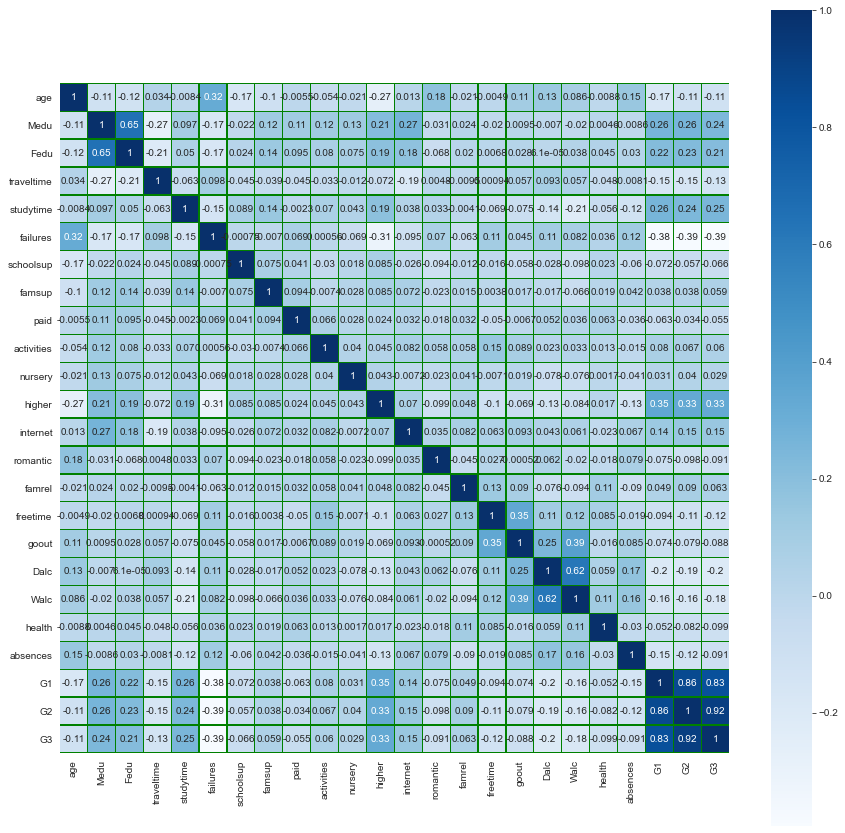

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(student_data_num.corr(),
            linewidths = 0.25,
            square = True,
            cmap = 'Blues',
            linecolor = 'green',
            annot= True);

This correlation heatmap shows a few variables that were not included in the previous heatmap since I changed some string variables to numerical. We can see that there is a moderate positive correlation between the variable 'higher' which indicates if a student has plans to attend higher education, and G1, G2, G3.

In [17]:
from sklearn.metrics import r2_score
#fit the model using only TV and radio
lm2= LinearRegression().fit(X_multi, Y_target)
#predict y using TV and radio
lm2_pred=lm2.predict(X_multi)
#show the R^2 score
print('R^2:', r2_score(Y_target,lm2_pred))

R^2: 0.8544819207089979


### Training and Validation

In [18]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi,student_data_num.G3)



In [19]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(486, 23) (163, 23) (486,) (163,)


In [20]:
# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression()

In [21]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [22]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 1.34
Fit a model X_train, and calculate MSE with X_test and Y_test: 2.12


Text(0.5, 1.0, 'Residual Plots')

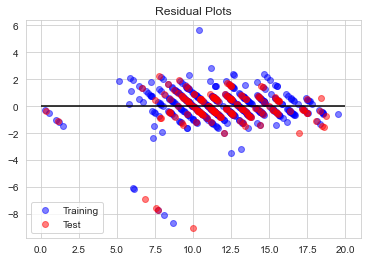

In [23]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=0,xmax=20)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

The residuals mostly hover around 0 with a few outliers. The residuals show a pattern of diagonal lines. I think that is because the target variable is discrete.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test=train_test_split(X_multi, Y_target, random_state=1)
#fit the model using the training data
lm4=LinearRegression().fit(X_train, y_train)
#predict outcomes using the X_test data 
#and the function created by the training data
lm4_pred=lm4.predict(X_test)

In [25]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm4_pred)))
print('R^2: ', r2_score(y_test, lm4_pred))


RMSE:  1.3078981804447378
R^2:  0.8567366379593976


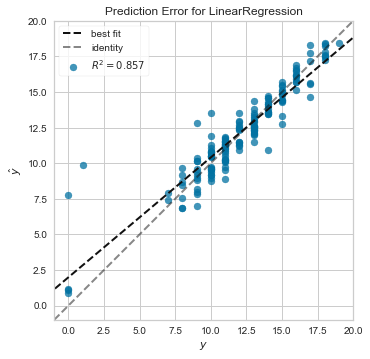

In [26]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer=PredictionError(lm4).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

The points lie relatively close to the best fit line. There are a few outliers.

## Feature Selection

In [48]:
X=student_data_num[['failures', 'schoolsup', 'famsup', 'paid', 'higher', 'internet', 'G1', 'G2' ]]
y=student_data_num.G3

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=1)
#fit the model using the training data
lm5=LinearRegression().fit(X_train, y_train)
#predict outcomes using the X_test data and the function created by the training data
lm5_pred=lm5.predict(X_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm5_pred)))
print('R^2: ', r2_score(y_test, lm5_pred))

RMSE:  1.2943720999621047
R^2:  0.8596845304219637


In this model, I took out a few of the features with low coefficients, but it does not have much affect on the model.

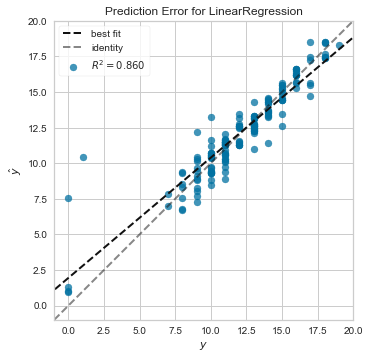

In [49]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer=PredictionError(lm5).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

### Adding in Interaction Terms

In [51]:
student_data_num['interaction1']=student_data_num['Medu']*student_data_num['Fedu']
student_data_num['interaction2']=student_data_num['Dalc']*student_data_num['Walc']

X=student_data_num[['failures', 'schoolsup', 'famsup', 'paid', 'higher', 
                    'internet', 'G1', 'G2', 'interaction1', 'interaction2' ]]
y=student_data_num.G3

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=1)
#fit the model using the training data
lm6=LinearRegression().fit(X_train, y_train)
#predict outcomes using the X_test data and the function created by the training data
lm6_pred=lm6.predict(X_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm6_pred)))
print('R^2: ', r2_score(y_test, lm6_pred))

RMSE:  1.292437689085112
R^2:  0.8601036138511075


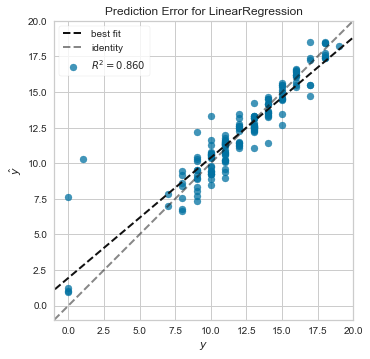

In [52]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer=PredictionError(lm6).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

In [55]:
student_data_num['interaction3']=student_data_num['freetime']*student_data_num['goout']
X=student_data_num[['failures', 'schoolsup', 'famsup', 'paid', 'higher', 
                    'internet', 'absences', 'studytime', 'activities', 'nursery',
                    'freetime', 'goout', 'Medu', 'Fedu', 'G1', 'G2', 'interaction1', 'interaction3' ]]
y=student_data_num.G3

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=1)
#fit the model using the training data
lm7=LinearRegression().fit(X_train, y_train)
#predict outcomes using the X_test data and the function created by the training data
lm7_pred=lm7.predict(X_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm7_pred)))
print('R^2: ', r2_score(y_test, lm7_pred))

RMSE:  1.2919623037023218
R^2:  0.8602065085078303


For this test, I included features I thought would be most likely to affect G3. I included the interaction terms Medu* Fedu and freetime * goout. The R^2 value is still 0.86. I think this is because G1 and G2 have such a high correlation with G3 that the other variables are not adding much to the model.

In [57]:
X=student_data_num[['G1', 'G2']]
y=student_data_num.G3

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=1)
#fit the model using the training data
lm8=LinearRegression().fit(X_train, y_train)
#predict outcomes using the X_test data and the function created by the training data
lm8_pred=lm8.predict(X_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm8_pred)))
print('R^2: ', r2_score(y_test, lm8_pred))

RMSE:  1.2777455399124793
R^2:  0.8632661586206845


Only using G1 and G2 does not improve the model much.

In [58]:
student_data_num['interaction3']=student_data_num['freetime']*student_data_num['goout']
X=student_data_num[['failures', 'schoolsup', 'famsup', 'paid', 'higher', 
                    'internet', 'absences', 'studytime', 'activities', 'nursery',
                    'freetime', 'goout', 'Medu', 'Fedu', 'interaction1', 'interaction3' ]]
y=student_data_num.G3

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=1)
#fit the model using the training data
lm9=LinearRegression().fit(X_train, y_train)
#predict outcomes using the X_test data and the function created by the training data
lm9_pred=lm9.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm9_pred)))
print('R^2: ', r2_score(y_test, lm9_pred))

RMSE:  3.1181265686537394
R^2:  0.18571816410794018


Taking out G1 and G2 decreases the accuracy of the model.